In [1]:
import csv

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv('Gautam Ahuja - Admission_Predict.csv')

In [6]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


<AxesSubplot: >

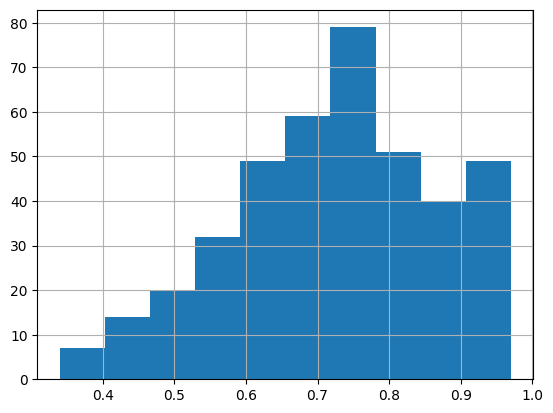

In [7]:
df['Chance of Admit '].hist()

In [8]:
df['Chance of Admit '].median()

0.73

In [9]:
df['Admit'] = df['Chance of Admit ']>0.73

In [10]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92,True
1,2,324,107,4,4.0,4.5,8.87,1,0.76,True
2,3,316,104,3,3.0,3.5,8.00,1,0.72,False
3,4,322,110,3,3.5,2.5,8.67,1,0.80,True
4,5,314,103,2,2.0,3.0,8.21,0,0.65,False
...,...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82,True
396,397,325,107,3,3.0,3.5,9.11,1,0.84,True
397,398,330,116,4,5.0,4.5,9.45,1,0.91,True
398,399,312,103,3,3.5,4.0,8.78,0,0.67,False


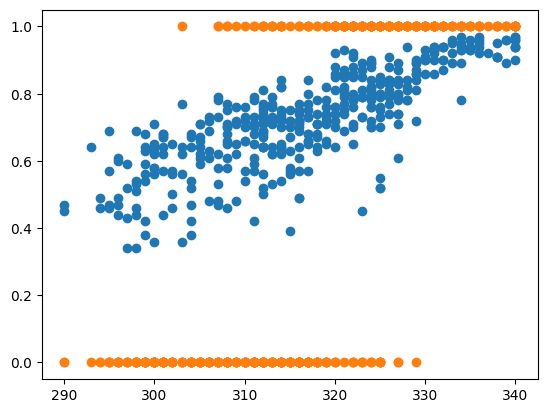

In [11]:
plt.scatter(df['GRE Score'],df['Chance of Admit '])
plt.scatter(df['GRE Score'],df['Admit'])

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

In [13]:
X = df['GRE Score'].to_numpy()[:,np.newaxis]
Y = df['Chance of Admit ']
Y = Y.values.reshape(-1, 1)

In [14]:
lr = LinearRegression()
LR = LogisticRegression()

In [15]:
lr.fit(X,Y)

LinearRegression()

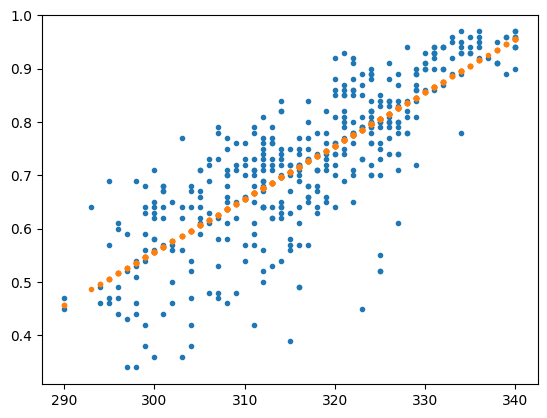

In [16]:
# This plot shows the nice linear regression fit between GRE score and Chance of admit

plt.plot(X,Y,'.')
plt.plot(X,lr.predict(X),'.')

In [17]:
#Instead of using linear regression now do logistic regression on target output classes of Admit
Y = df['Admit']
Y = Y.values

In [18]:
Y.shape

(400,)

In [19]:
LR.fit(X,Y)

LogisticRegression()

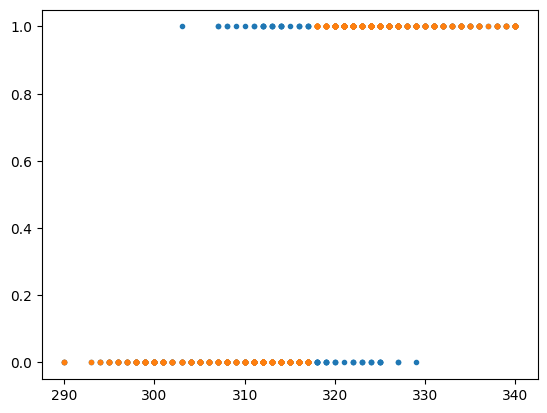

In [20]:
# this is the Logistic Regression prediction (along with ground truth)
plt.plot(X,Y,'.')
plt.plot(X,LR.predict(X),'.')

In [21]:
df.keys()

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit ', 'Admit'],
      dtype='object')

### Q1
```
A. Use 4 features from above to set up your data matrix X. These 4 features should in your opinion best predict Admit decision (4 pts)
B. Split X, Y into train, val, test (2 pts) 
C. Scale and Augment X appropriately (4 pts)
```


In [22]:
df.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Admit
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336,0.012375
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610,0.698730
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594,0.665224
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250,0.636589
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732,0.612687
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889,0.558163
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289,0.733278
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202,0.547302
Chance of Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000,0.801170
Admit,0.012375,0.698730,0.665224,0.636589,0.612687,0.558163,0.733278,0.547302,0.801170,1.000000


Our Logistic Regression Model will Calculate the Chance of Admit (target output).

We plot a covarriance matrix with all the features to see which features are most correlated with the target output. We can see that the most correlated features are CGPA, GRE Score, TOEFL Score, and University Rating. We will use these features to set up our data matrix X.


In [23]:
X = df[['CGPA','GRE Score','TOEFL Score','University Rating']].to_numpy()

In [24]:
Y = df['Admit'] = df['Chance of Admit ']>0.73

In [25]:
X.shape

(400, 4)

In [26]:
# Augment X with a column of ones at the beginning
X = np.hstack((np.ones((X.shape[0],1)),X))

In [27]:
X.shape

(400, 5)

In [28]:
def train_val_test_split(X, Y):
    p = np.random.permutation(len(Y))
    tr = np.floor(len(Y)*0.7).astype('int')
    te = np.floor(len(Y)*0.8).astype('int')
    X_train = X[p[:tr],:]
    Y_train = Y[p[:tr]]
    X_val = X[p[tr+1:te],:]
    Y_val = Y[p[tr+1:te]]
    X_test = X[p[te+1:],:]
    Y_test = Y[p[te+1:]]
    return X_train, Y_train, X_val, Y_val, X_test, Y_test 

In [29]:
# Train Test Split
X_train, Y_train, X_val, Y_val, X_test, Y_test = train_val_test_split(X, Y)

In [30]:
# Standard Data Scaling except for the first column
X_train_scaled = X_train.copy()
X_train_scaled[:,1:] = (X_train[:,1:] - X_train[:,1:].mean(axis=0))/X_train[:,1:].std(axis=0)
X_val_scaled = X_val.copy()
X_val_scaled[:,1:] = (X_val[:,1:] - X_train[:,1:].mean(axis=0))/X_train[:,1:].std(axis=0)

In [31]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [32]:
def compute_cross_entropy_loss(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    epsilon = 1e-5
    cost = (1/m)*(((-y).T @ np.log(h + epsilon))-((1-y).T @ np.log(1-h + epsilon)))
    return cost

def predict(X, params):
    return np.round(sigmoid(X @ params))


### Q2
``` Report cross entropy loss for a random prediction of Y_val and for predictions from LR.predict(X_val) (5 pts)```

In [33]:
# Fit the LR model
LR.fit(X_train_scaled, Y_train)

LogisticRegression()

In [34]:
# Get the parameters 
theta = LR.coef_[0]
theta

array([-3.87535018e-05,  1.65948194e+00,  1.07472501e+00,  5.90133207e-01,
        8.62965636e-01])

In [35]:
# Report cross entropy loss for a random prediction of Y_val
cost_val = compute_cross_entropy_loss(X_val_scaled, Y_val, theta)
cost_val

-1.6353879523750936

In [36]:
# Report cross entropy loss for predictions from LR.predict(X_val)
X_val_pred = LR.predict(X_val_scaled)
# convert X_val_pred to pandas series
X_val_pred = pd.Series(X_val_pred)
cost_pre = compute_cross_entropy_loss(X_val_scaled, X_val_pred, theta)
cost_pre

-1.737248505380329

In [37]:
def init(X,zeros=True):
    n = X.shape[1]
    if zeros:
        theta = np.zeros((n,1))
    else:
        theta = np.random.rand(n,1)-0.5
        theta[-1] = 0
    return theta

In [38]:
# This is batch gradient descent that updates using all training samples
def update_weights( X, Y,  theta ) :
        #Y_pred = predict(X, theta)  
        # calculate gradients  
        m = X.shape[0]
        dtheta = - ( 2 * ( ( X.T ).dot( Y - sigmoid(np.matmul(X,theta)) ) ) ) / m
        cost_history = compute_cross_entropy_loss(X, Y, theta)  
        return dtheta,cost_history

### Q3 
``` Implement an iterative method that at each iterations selects a random theta and if this theta improves cross_entropy_loss keeps the theta, else discards the theta. plot the cross_entropy loss history (over iterations for X_val) with this method. (10 pts)```
### Bonus
``` Implement an iterative method that at each iterations gets a random *dtheta* and if  theta+learning_rate*dtheta improves cross_entropy_loss it updates  theta with dtheta, else discards dtheta. plot the cross_entropy loss history (over iterations for X_val) with this method. (10 pts)```

In [39]:
def random_theta(X, Y, theta, iterations):
    cost_history = np.zeros(iterations)
    best_theta = theta
    best_cost = compute_cross_entropy_loss(X, Y, theta)
    for i in range(iterations):
        theta = init(X, zeros=False)
        cost_history[i] = compute_cross_entropy_loss(X, Y, theta)
        if abs(cost_history[i]) < abs(best_cost):
            best_theta = theta
            best_cost = cost_history[i]
        # if abs(cost_history[i] - best_cost) < 1e-4:
        #     break
    return best_theta, cost_history, best_cost

In [40]:
best_theta_random, cost_history_random, best_cost_random = random_theta(X_val_scaled, Y_val, theta, 100)

Text(0.5, 1.0, 'Best cost: -0.0019603037435665907')

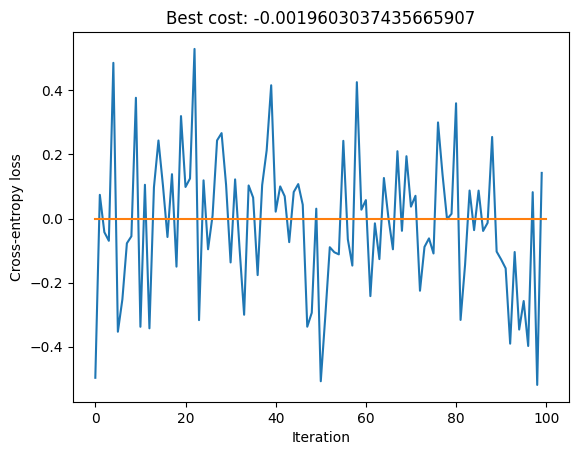

In [41]:
# Plot the cost history over iterations
plt.xlabel('Iteration')
plt.ylabel('Cross-entropy loss')
plt.plot(cost_history_random)
# Report the best cost
plt.plot([0,100],[best_cost_random,best_cost_random])
# title best cost
plt.title('Best cost: ' + str(best_cost_random))

#### Q3 BONUS

In [42]:
def random_theta_with_update(X, Y, theta, iterations,learning_rate):
    cost_history = np.zeros(iterations)
    best_theta = theta
    best_cost = compute_cross_entropy_loss(X, Y, theta)
    for i in range(iterations):
        dtheta = init(X, zeros=False)
        # print(dtheta.shape)
        theta = theta - learning_rate * dtheta.reshape(-1)
        cost_history[i] = compute_cross_entropy_loss(X, Y, theta)
        if abs(cost_history[i]) < abs(best_cost):
            best_theta = theta
            best_cost = cost_history[i]
        # if abs(cost_history[i] - best_cost) < 1e-12:
        #     break
    return best_theta, cost_history, best_cost

In [43]:
best_theta_update, cost_history_update, best_cost_update = random_theta_with_update(X_val_scaled, Y_val, theta, 100, 0.0001)

Text(0.5, 1.0, 'Best cost: -1.6352489606786749')

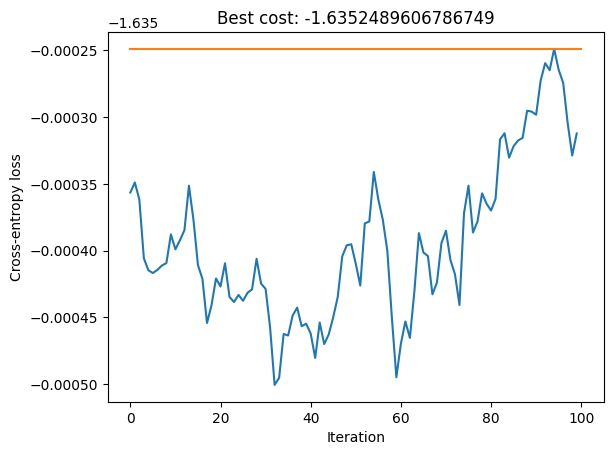

In [44]:
# Plot over iteratrion 
plt.xlabel('Iteration')
plt.ylabel('Cross-entropy loss')
plt.plot(cost_history_update)
# plot best_cost_update
plt.plot([0,100],[best_cost_update,best_cost_update])
# title best cost
plt.title('Best cost: ' + str(best_cost_update))

### Q4

``` From Lab1 get the gradient descent  -- update over entire training sample, update over a  sample, update over a batch of sample -- that worked best for you. Also play with learning rate to get to the best cross_entropy_loss.  plot the cross_entropy loss history (over iterations for X_val) with this method. (20 pts)```

In [45]:
def gradient_descent(X, Y, iterations, learning_rate):
    theta = init(X, zeros=False)
    theta = theta.reshape(-1)
    best_theta = theta
    best_cost = compute_cross_entropy_loss(X, Y, theta)
    cost_history = np.zeros(iterations)
    for i in range(iterations):
        dtheta, cost_history[i] = update_weights(X, Y, theta)
        if abs(cost_history[i])<abs(best_cost) :
            best_theta = theta
            best_cost = cost_history[i]
        theta = theta - learning_rate * dtheta#.reshape(-1)
    return best_theta, cost_history, best_cost


In [46]:
gd_theta, gd_cost, gd_best_cost = gradient_descent(X_val_scaled, Y_val, 100, 0.01)

In [47]:
gd_theta

array([ 0.39275998,  0.57090662, -0.30308743, -0.05470438,  0.11311073])

In [48]:
theta

array([-3.87535018e-05,  1.65948194e+00,  1.07472501e+00,  5.90133207e-01,
        8.62965636e-01])

Text(0.5, 1.0, 'Best cost: 0.0043943343004021725')

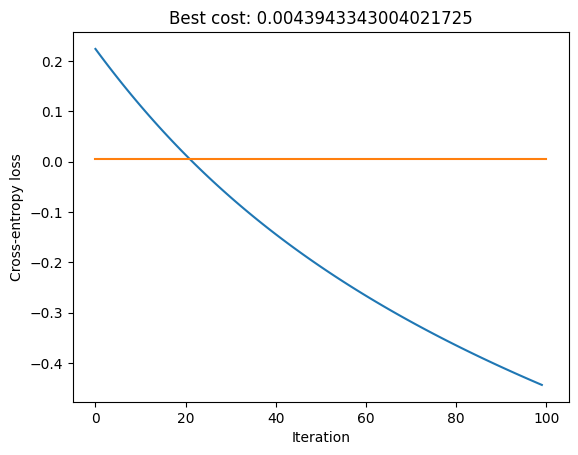

In [49]:
# Plot over iteratrion 
plt.xlabel('Iteration')
plt.ylabel('Cross-entropy loss')
plt.plot(gd_cost)
# plot best_cost_update
plt.plot([0,100],[gd_best_cost,gd_best_cost])
# title best cost
plt.title('Best cost: ' + str(gd_best_cost))

```There is an alternate to cross_entropy_loss for binary classification. It is known as hinge loss```
$l(x_i) =  max(0,1-y_i\theta x_i)$ ```with the assumption that y_i = {+1, -1}```

``` if y_i and``` $\theta x_i$ ```have same sign and``` $|\theta x_i|$ ```is larger than one, loss will be zero. That is prediction matches label and prediction has magnitude greater than one there is no loss. If prediction and label have opposite sign, loss will be greater than zero -- incorrect prediction there is a loss. There is also a loss if magnitude of prediction is less than zero even if they have the same sign. Hinge loss wants correct and incorrect classification to have a margin of atleast one. ```

In [50]:
def hinge_loss(X, Y, theta):
    scores = X.dot(theta)
    # initiate margins with zeros of same length as Y
    loss_matrix = np.zeros(len(Y))
    for i in range(len(Y)):
        # if Y[i]*scores[i] has same sign
        if Y[i]*scores[i] > 0:
            # margin is 0
            loss_matrix[i] = 0
        if Y[i]*scores[i] < 0:
            # loss is the incorrect score
            loss_matrix[i] = scores[i]
        if Y[i]*scores[i] > 0 and scores[i] < 0:
            loss_matrix[i] = scores[i]
    # return loss as max(0, 1 - Y[i]*scores[i])
    return np.mean(loss_matrix)

### Q5
```
Implement Hinge loss and use random search method in Q3 to reduce loss and find a better theta. plto the hinge loss history (over iterations for X_val) with this method. (10 pts)
```
### Bonus
```
Implement SGD update rule for hinge loss by first find derivative of hinge loss over theta. Use SGD to optimize hinge loss. plot the hinge loss history (over iterations for X_val) with this method. 
```

In [51]:
def random_theta_theta(X, Y, theta, iterations):
    cost_history = np.zeros(iterations)
    best_theta = theta
    Y = np.where(Y == False, -1, 1)
    best_cost = hinge_loss(X, Y, theta)
    for i in range(iterations):
        theta = init(X, zeros=False)
        cost_history[i] = hinge_loss(X, Y, theta)
        if abs(cost_history[i]) < abs(best_cost):
            best_theta = theta
            best_cost = cost_history[i]
        # if abs(cost_history[i] - best_cost) < 1e-4:
        #     break
    return best_theta, cost_history, best_cost


In [52]:
theta_hinge = init(X, zeros=False)
theta_hinge = theta_hinge.flatten()
best_theta_hinge, cost_history_hinge, best_cost_hinge = random_theta_theta(X_val_scaled, Y_val, theta_hinge, 100)

Text(0.5, 1.0, 'Best cost: -0.0005993526172983776')

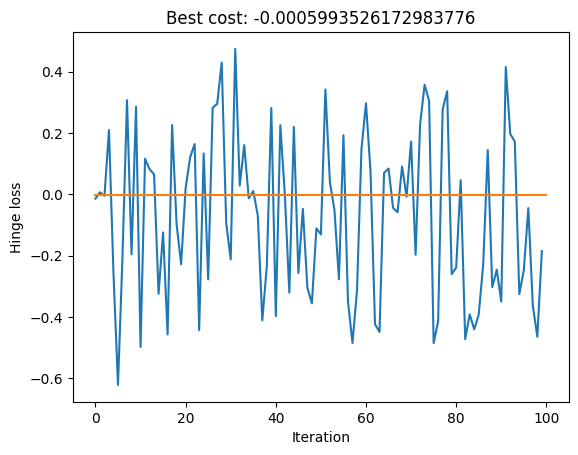

In [53]:
# Plot the cost history over iterations
plt.xlabel('Iteration')
plt.ylabel('Hinge loss')
plt.plot(cost_history_hinge)
# Report the best cost
plt.plot([0,100],[best_cost_hinge,best_cost_hinge])
# title best cost
plt.title('Best cost: ' + str(best_cost_hinge))

In [54]:
def hinge_loss_gradient(X, Y, theta):
    scores = X.dot(theta)
    # initiate margins with zeros of same length as Y
    margins = Y * scores
    mask = margins < 1
    dtheta = np.zeros((X.shape[1],))
    dtheta += np.sum(-Y[mask, np.newaxis] * X[mask], axis=0)
    margins = np.maximum(0, 1 - Y * scores)
    # # set the gradients of the margins to -Y
    # margins_grad = -Y * (margins > 0)
    # # compute the gradient of the loss with respect to theta
    # gradient = -2 * X.T.dot(margins_grad) / len(Y)
    return dtheta

def hinge_loss_SGD(X, Y, iterations, learning_rate):
    # initialize theta randomly
    theta = init(X, zeros=False)
    theta = theta.flatten()
    # initialize the loss history
    loss_history = []
    Y = np.where(Y == False, -1, 1)
    for i in range(iterations):
        # compute the gradient of the loss with respect to theta
        gradient = hinge_loss_gradient(X, Y, theta)
        # update theta using SGD
        theta = theta - learning_rate * gradient
        # compute the loss and append it to the loss history
        loss = hinge_loss(X, Y, theta)
        loss_history.append(loss)
    return theta, loss_history

In [55]:
theta_SGD, loss_history_SGD = hinge_loss_SGD(X_val_scaled, Y_val, 100, 0.01)

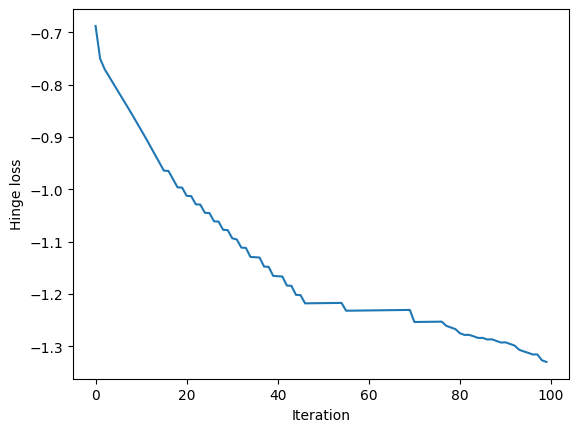

In [56]:
# Plot the cost history over iterations
plt.xlabel('Iteration')
plt.ylabel('Hinge loss')
plt.plot(loss_history_SGD)

### Q6

```  In this problem you will create your own target function f (probability in this case) and data set D to see how Logistic Regression works. For simplicity, we will take f to be a 0/1 probability so y is a deterministic function of x. Take n = 2 so you can visualize the problem, and let X = [−1, 1]×[−1, 1] with uniform probability of picking each x ∈ X . Choose a line in the plane as the boundary between f(x) = 1 (where y has to be +1) and f(x) = 0 (where y has to be −1) by taking two random, uniformly distributed points from X and taking the line passing through them as the boundary between y = ±1. Pick m = 100 training points at random from X, and evaluate the outputs y_m for each of these points x_m.```

```
Run Logistic Regression with Stochastic Gradient Descent to find g, and estimate E_out (the cross entropy error) by generating a sufficiently large, separate set of points to evaluate the error. Repeat the experiment for 100 runs with different targets and take the average. Initialize the weight vector of Logistic Regression to all zeros in each run. Stop the algorithm when ∥w(t−1) − w(t)∥ < 0.01, where w(t) denotes the weight vector at the end of epoch t. An epoch is a full pass through the N data points (use a random permutation of 1, 2, · · · , N to present the data points to the algorithm within each epoch, and use different permutations for different epochs). Use a learning rate of 0.01.
```

In [63]:
# As givgen in the question, we have the following parameters
N = 100
n_runs = 100 
X_min, X_max = -1, 1 
learning_rate = 0.01 

In [64]:
# Creatingt the data
def generate_data(N):
    # generate N points uniformly at random in [-1, 1]x[-1, 1]
    X = np.random.uniform(X_min, X_max, (N, 2)) 
    # choose two points at random
    p1, p2 = np.random.choice(N, 2, replace=False) 
    # compute the slope of the line passing through the two points using formula y = mx + c: m = (y2 - y1) / (x2 - x1)
    slope = (X[p1, 1] - X[p2, 1]) / (X[p1, 0] - X[p2, 0]) 
    # compute the y-intercept of the line using formula y = mx + c: c = y - mx
    intercept = X[p1, 1] - slope * X[p1, 0] 
    # compute the labels of the points using the sign of the distance to the line
    y = np.sign(X[:, 1] - slope * X[:, 0] - intercept) 
    return X, y

In [68]:
# logistic regression algorithm using stochastic gradient descent:
def logistic_regression_sgd(X, y, learning_rate, tolerance):
    theta = np.zeros(X.shape[1]) # initialize theta parameter vector to zeros
    dtheta = np.inf # initialize dtheta
    while dtheta >= tolerance:
        prev_theta = theta.copy()
        # shuffle the data
        permutation = np.random.permutation(X.shape[0]) 
        for i in permutation:
            x_i, y_i = X[i], y[i]
            #  compute the gradient of the cross-entropy error. This is the same as the gradient of the logistic loss
            gradient = y_i * x_i / (1 + np.exp(y_i * np.dot(theta, x_i))) 
            theta = theta + learning_rate * gradient # update theta vector
        dtheta = np.linalg.norm(theta - prev_theta) # compute change in weight vector
    return theta

In [72]:
#This will run the experiment for 100 runs, and output the average E_out over all runs
E_outs = [] # list to store E_out values for each run
for run in range(n_runs):
    X_train, y_train = generate_data(N) # generate training set
    theta = logistic_regression_sgd(X_train, y_train, learning_rate, 1e-2)
    X_test, y_test = generate_data(10*N) # generate test set with 10 times as many points as training set
    y_pred = np.sign(np.dot(X_test, theta)) # predict class labels for test set
    E_out = np.mean(np.log(1 + np.exp(-y_test * np.dot(X_test, theta)))) # compute cross-entropy error on test set
    E_outs.append(E_out)
print("Average E_out:", np.mean(E_outs))

Average E_out: 1.0684848891722702
